# Hubway Challegence

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Libraries

These are the libraries that I'm going to use during the exploration process

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

Let's load the two dataset provided by the challagence

In [3]:
stations = pd.read_csv("dataset/hubway_stations.csv")
trips = pd.read_csv("dataset/hubway_trips.csv")
crime_boston = pd.read_csv('dataset/crime.csv', encoding='latin-1')

In [3]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
id           142 non-null int64
terminal     142 non-null object
station      142 non-null object
municipal    142 non-null object
lat          142 non-null float64
lng          142 non-null float64
status       142 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 7.8+ KB


In [4]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579025 entries, 0 to 1579024
Data columns (total 13 columns):
seq_id        1579025 non-null int64
hubway_id     1579025 non-null int64
status        1579025 non-null object
duration      1579025 non-null int64
start_date    1579025 non-null object
strt_statn    1579011 non-null float64
end_date      1579025 non-null object
end_statn     1578980 non-null float64
bike_nr       1578559 non-null object
subsc_type    1579025 non-null object
zip_code      1106259 non-null object
birth_date    350644 non-null float64
gender        1106414 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 156.6+ MB


In [6]:
crime_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
INCIDENT_NUMBER        327820 non-null object
OFFENSE_CODE           327820 non-null int64
OFFENSE_CODE_GROUP     327820 non-null object
OFFENSE_DESCRIPTION    327820 non-null object
DISTRICT               326046 non-null object
REPORTING_AREA         327820 non-null object
SHOOTING               1055 non-null object
OCCURRED_ON_DATE       327820 non-null object
YEAR                   327820 non-null int64
MONTH                  327820 non-null int64
DAY_OF_WEEK            327820 non-null object
HOUR                   327820 non-null int64
UCR_PART               327727 non-null object
STREET                 316843 non-null object
Lat                    307188 non-null float64
Long                   307188 non-null float64
Location               327820 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 42.5+ MB


## First Look at the Data

In [9]:
trips.head(3)

seq_id  hubway_id  status  duration          start_date  strt_statn  \
0       1          8  Closed         9  7/28/2011 10:12:00        23.0   
1       2          9  Closed       220  7/28/2011 10:21:00        23.0   
2       3         10  Closed        56  7/28/2011 10:33:00        23.0   

             end_date  end_statn bike_nr  subsc_type zip_code  birth_date  \
0  7/28/2011 10:12:00       23.0  B00468  Registered   '97217      1976.0   
1  7/28/2011 10:25:00       23.0  B00554  Registered   '02215      1966.0   
2  7/28/2011 10:34:00       23.0  B00456  Registered   '02108      1943.0   

  gender  
0   Male  
1   Male  
2   Male

In [10]:
crime_boston.head(3)

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   

         OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0       DISTURBING THE PEACE      E18            495      NaN   
1            PROPERTY - LOST      D14            795      NaN   
2  THREATS TO DO BODILY HARM       B2            329      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   

         STREET        Lat       Long                     Location  
0  ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)  
1    ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)  
2      DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)

In [11]:
stations.head(3)

id terminal                             station municipal        lat  \
0   3   B32006              Colleges of the Fenway    Boston  42.340021   
1   4   C32000         Tremont St. at Berkeley St.    Boston  42.345392   
2   5   B32012  Northeastern U / North Parking Lot    Boston  42.341814   

         lng    status  
0 -71.100812  Existing  
1 -71.069616  Existing  
2 -71.090179  Existing

## Questions and Answers About the Data

### Who’s using the bikes?

_More men or more women?_

In [12]:
pd.crosstab(trips.loc[:,'gender'], trips.loc[:,'gender'])

gender  Female    Male
gender                
Female  271700       0
Male         0  834714

We can conclude that the number of male is higher than the reports made by women.

_Older or younger people?_

In [13]:
age = 2013 - trips.loc[:,'birth_date']
age = age.dropna().copy()
age_period = []
for i in age:
    age_period.append("young" if i<35 else "old")
pd.crosstab(np.array(age_period),np.array(age_period))

col_0     old   young
row_0                
old    165636       0
young       0  185008

We have more people registered that were young

_Subscribers or one time users?_

In [14]:
pd.crosstab(trips.loc[:,'subsc_type'], trips.loc[:,'subsc_type'])

subsc_type  Casual  Registered
subsc_type                    
Casual      472611           0
Registered       0     1106414

Our data shows that registered values are more than the casual category

## Where are bikes being checked out?

_More in Boston than Cambridge?_

In [13]:
hubway_data_with_gps = trips.join(stations, lsuffix='id', rsuffix='strt_statn')
hubway_data_with_gps.head(3)

seq_id  hubway_id statusid  duration          start_date  strt_statn  \
0       1          8   Closed         9  7/28/2011 10:12:00        23.0   
1       2          9   Closed       220  7/28/2011 10:21:00        23.0   
2       3         10   Closed        56  7/28/2011 10:33:00        23.0   

             end_date  end_statn bike_nr  subsc_type zip_code  birth_date  \
0  7/28/2011 10:12:00       23.0  B00468  Registered   '97217      1976.0   
1  7/28/2011 10:25:00       23.0  B00554  Registered   '02215      1966.0   
2  7/28/2011 10:34:00       23.0  B00456  Registered   '02108      1943.0   

  gender   id terminal                             station municipal  \
0   Male  3.0   B32006              Colleges of the Fenway    Boston   
1   Male  4.0   C32000         Tremont St. at Berkeley St.    Boston   
2   Male  5.0   B32012  Northeastern U / North Parking Lot    Boston   

         lat        lng statusstrt_statn  
0  42.340021 -71.100812         Existing  
1  42.345392 -71.069616         Existing  
2  42.341814 -71.090179         Existing

In [18]:
pd.crosstab(hubway_data_with_gps[hubway_data_with_gps.municipal.isin(["Boston", "Cambridge"])].municipal, 
            hubway_data_with_gps[hubway_data_with_gps.municipal.isin(["Boston", "Cambridge"])].municipal)

municipal  Boston  Cambridge
municipal                   
Boston         97          0
Cambridge       0         28

In [14]:
counter_df = pd.DataFrame(hubway_data_with_gps.station.value_counts())
counter_df.reset_index(inplace=True)
counter_df.columns = ['station', 'count']
counter_df.head()

station  count
0      Mayor Thomas M. Menino - Government Center      2
1  Andrew Station - Dorchester Ave at Humboldt Pl      2
2                           Boylston at Fairfield      2
3   Charles Circle - Charles St. at Cambridge St.      2
4                                   Dudley Square      2

In [15]:
hubway_data_with_gps = hubway_data_with_gps.join(counter_df, lsuffix='station', rsuffix='station')        
hubway_data_with_gps.head(3)

seq_id  hubway_id statusid  duration          start_date  strt_statn  \
0       1          8   Closed         9  7/28/2011 10:12:00        23.0   
1       2          9   Closed       220  7/28/2011 10:21:00        23.0   
2       3         10   Closed        56  7/28/2011 10:33:00        23.0   

             end_date  end_statn bike_nr  subsc_type  ...  gender   id  \
0  7/28/2011 10:12:00       23.0  B00468  Registered  ...    Male  3.0   
1  7/28/2011 10:25:00       23.0  B00554  Registered  ...    Male  4.0   
2  7/28/2011 10:34:00       23.0  B00456  Registered  ...    Male  5.0   

  terminal                      stationstation municipal        lat  \
0   B32006              Colleges of the Fenway    Boston  42.340021   
1   C32000         Tremont St. at Berkeley St.    Boston  42.345392   
2   B32012  Northeastern U / North Parking Lot    Boston  42.341814   

         lng  statusstrt_statn  \
0 -71.100812          Existing   
1 -71.069616          Existing   
2 -71.090179          Existing   

                                   stationstation count  
0      Mayor Thomas M. Menino - Government Center   2.0  
1  Andrew Station - Dorchester Ave at Humboldt Pl   2.0  
2                           Boylston at Fairfield   2.0  

[3 rows x 22 columns]

In [8]:
from folium.plugins import HeatMap
import folium

def generateBaseMap(default_location=[42.340021, -71.100812], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [17]:
base_map = generateBaseMap()
HeatMap(data=hubway_data_with_gps[['lat', 'lng', 'count']].groupby(['lat', 'lng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map.save(outfile=" bikes_checked.html")

The data shows that the trips were done at Boston.

_More in commercial or residential?_

It is presented in commercial areas.

_More around tourist attractions?_

Yes, the data allows us to understand that the trips were around tourist attractions (according to https://www.planetware.com/tourist-attractions-/boston-us-ma-boston.htm)

### When are the bikes being checked out?

More during the weekend than on the weekdays?

_what are the hours of high checkouts?_

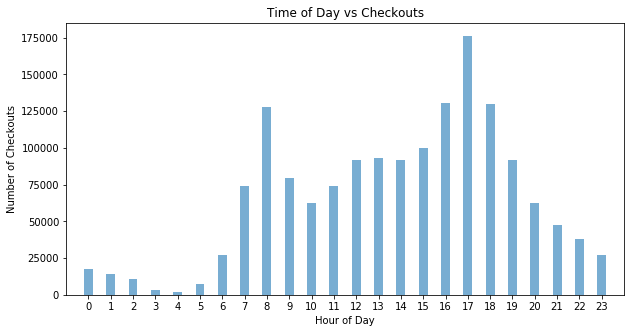

In [22]:
check_out_hours = trips['start_date'].apply(lambda s: int(s[-8:-6]))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

check_out_counts = np.unique(check_out_hours, return_counts=True)
ax.bar(check_out_counts[0], check_out_counts[1], align='center', width=0.4, alpha=0.6)
ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')

plt.show()

## Crimes in 2015

In [18]:
crime_boston2015 = crime_boston[crime_boston.YEAR == 2015]
base_map = generateBaseMap()
HeatMap(data=crime_boston2015[['Lat', 'Long']].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map.save(outfile="crimes_2015.html")

In [19]:
base_map = generateBaseMap()
base_map.choropleth(geo_path='dataset/Public_Works_Districts.geojson')
base_map.save(outfile="test2.html")

TypeError: __init__() missing 1 required positional argument: 'geo_data'

## References
+ https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf
+ https://data.boston.gov/group/de706399-fa05-4c15-aaa6-b6bb11076616?res_format=GeoJSON&page=1